## Uppgift 3 - Merging Excercises

In [305]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://sv.wikipedia.org/wiki/Sveriges_demografi"
df = pd.read_html(url)[6]
df = df.rename(columns={"Unnamed: 0": "År", "Medel- folkmängd": "Folkmängd"})
df["Folkmängd"] = df["Folkmängd"].round(0)
df["Folkmängd"] = df["Folkmängd"].apply(lambda x: int(str(x).replace(" ", "").split(",")[0]))




df

,År,Folkmängd,Födda,Döda,Naturlig befolknings- förändring,Nativitet (per 1000),Dödstal (per 1000),Naturlig befolknings- förändring (per 1000),Total fertilitet
0,1900,5117000,138 139,86 146,51 993,270.0,168.0,102.0,402.0
1,1901,5156000,139 370,82 772,56 598,270.0,161.0,110.0,404.0
2,1902,5187000,137 364,79 722,57 642,265.0,154.0,111.0,395.0
3,1903,5210000,133 896,78 610,55 286,257.0,151.0,106.0,382.0
4,1904,5241000,134 952,80 152,54 800,257.0,153.0,105.0,383.0
...,...,...,...,...,...,...,...,...,...
118,2018,10175213,115 832,92 185,23 647,113.0,90.0,23.0,175.0
119,2019,10278887,114 523,88 766,28 727,111.0,87.0,24.0,170.0
120,2020,10353442,113 077,98 124,14 953,109.0,95.0,14.0,166.0
121,2021,10415810,114 263,91 958,22 305,110.0,88.0,22.0,NaN


     År  Folkmängd    Födda    Döda Naturlig befolknings- förändring  \
0  1900    5117000  138 139  86 146                           51 993   
1  1901    5156000  139 370  82 772                           56 598   
2  1902    5187000  137 364  79 722                           57 642   
3  1903    5210000  133 896  78 610                           55 286   
4  1904    5241000  134 952  80 152                           54 800   

   Nativitet (per 1000)  Dödstal (per 1000)  \
0                 270.0               168.0   
1                 270.0               161.0   
2                 265.0               154.0   
3                 257.0               151.0   
4                 257.0               153.0   

   Naturlig befolknings- förändring (per 1000)  Total fertilitet  
0                                        102.0             402.0  
1                                        110.0             404.0  
2                                        111.0             395.0  
3               

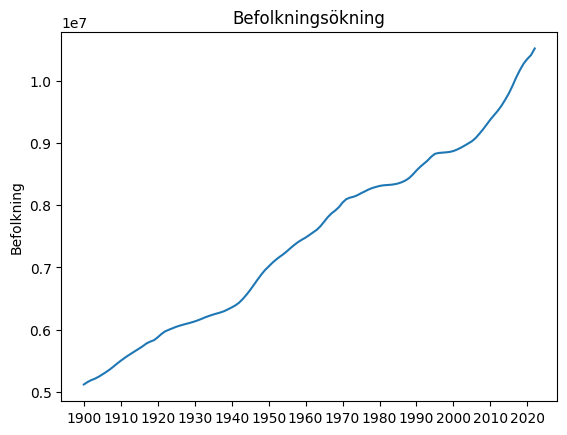

In [306]:

#Uppgift 1 b)

print(df.head())
print(df.info())
print(df.describe())
print(df.columns)

plt.plot(df["År"], df["Folkmängd"])
plt.xticks(df["År"][::10])
plt.title("Befolkningsökning")


plt.ylabel("Befolkning")
plt.show()


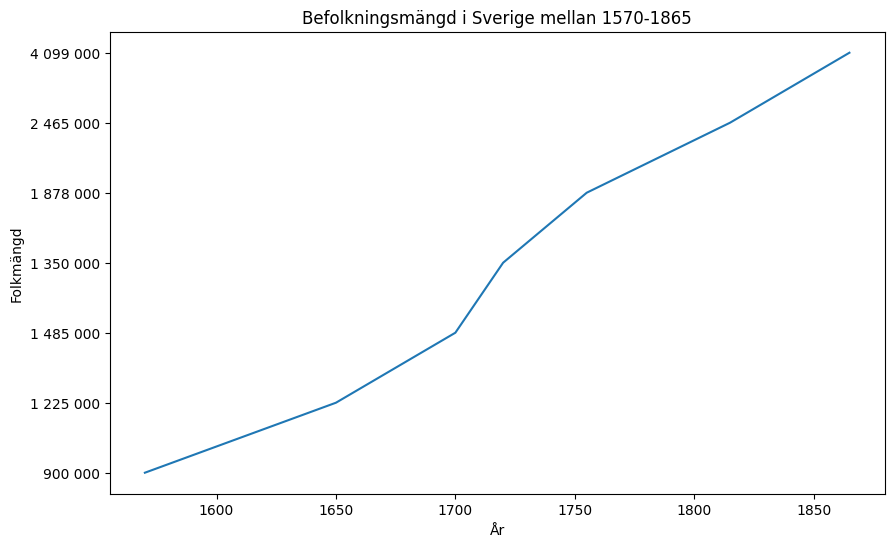

In [307]:

#Uppgift 1 c)

dfs = pd.read_html(url)
df_history = dfs[1]
df_history.columns = ["År", "Folkmängd", "Årlig tillväxt", "Promille"]
df_history = df_history.drop(df_history.tail(1).index)
df_history["År"] = df_history["År"].astype(int)
plt.figure(figsize=(10,6))
plt.plot(*df_history.query("1570 <= År <= 1865")[["År", "Folkmängd"]].values.T)
plt.xlabel("År")
plt.ylabel("Folkmängd")
plt.title("Befolkningsmängd i Sverige mellan 1570-1865")
plt.show()








In [309]:

#Uppgift 1 d)


df_total = pd.concat([df_history, df]).drop_duplicates("År").sort_values("År")
df_total = df_total.fillna(0)
df_total["År"] = df_total["År"].astype(int)
df_total["Folkmängd"] = df_total["År"].astype(int)

df_total

,År,Folkmängd,Årlig tillväxt,Promille,Födda,Döda,Naturlig befolknings- förändring,Nativitet (per 1000),Dödstal (per 1000),Naturlig befolknings- förändring (per 1000),Total fertilitet
0,1570,1570,—,—,0,0,0,0.0,0.0,0.0,0.0
1,1650,1650,4 063,386,0,0,0,0.0,0.0,0.0,0.0
2,1700,1700,5 200,386,0,0,0,0.0,0.0,0.0,0.0
3,1720,1720,−6 750,"−4,75",0,0,0,0.0,0.0,0.0,0.0
4,1755,1755,15 086,948,0,0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
118,2018,2018,0,0,115 832,92 185,23 647,113.0,90.0,23.0,175.0
119,2019,2019,0,0,114 523,88 766,28 727,111.0,87.0,24.0,170.0
9,2020,2020,0,0,0,0,0,0.0,0.0,0.0,0.0
121,2021,2021,0,0,114 263,91 958,22 305,110.0,88.0,22.0,0.0
